In [5]:
#Graduation_rate

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

grad_data_to_load = "/Users/raghi/Google Drive/RUTGERS DATA SCIENCE/Project l/project_dec/4YearGradRate .csv"
grad_data = pd.read_csv(grad_data_to_load)
grad_data_df = pd.DataFrame(grad_data).reset_index()

#To remove NaN
grad_data_df = grad_data_df.dropna(how ='any')
grad_data_df.head()





,index,COUNTY_CODE,COUNTY_NAME,DISTRICT_CODE,DISTRICT_NAME,SCHOOL_CODE,SCHOOL_NAME,SUBGROUP,2017 Adjusted Cohort Grad Rate,2016 Adjusted Cohort Grad Rate,2015 Adjusted Cohort Grad Rate,2014 Adjusted Cohort Grad Rate
0,0,1,ATLANTIC,110,ATLANTIC CITY,10,Atlantic City High School,S,80.54,76.14,73.71,70.32
2,2,1,ATLANTIC,120,ATLANTIC CO VOCATIONAL,10,Atlantic County Institute of Technology,S,98.74,99.04,98.08,97.48
4,4,1,ATLANTIC,590,BUENA REGIONAL,25,BUENA REGIONAL HIGH SCHOOL,S,86.98,91.71,90.56,87.98
6,6,1,ATLANTIC,1310,EGG HARBOR TWP,5,EGG HARBOR TOWNSHIP HIGH SCHOOL,S,94.18,92.27,93.85,93.09
8,8,1,ATLANTIC,1790,GREATER EGG HARBOR REG,40,Absegami High School,S,91.83,91.75,90.25,92.86


In [6]:
cleaned_graduation_data =grad_data_df[[
    "DISTRICT_NAME","SCHOOL_NAME","2014 Adjusted Cohort Grad Rate",
    "2015 Adjusted Cohort Grad Rate","2016 Adjusted Cohort Grad Rate","2017 Adjusted Cohort Grad Rate"
]]
#To transpose year column
cleaned_graduation_data = pd.melt(cleaned_graduation_data, id_vars=["DISTRICT_NAME","SCHOOL_NAME"], 
                  var_name="YEAR", value_name="GRAD_RATE")
#To select just the year part from the year column
cleaned_graduation_data["YEAR"] = cleaned_graduation_data["YEAR"].apply(lambda x: int(x[0:4]))

#To remove any record with grad rate = "-"
cleaned_graduation_data = cleaned_graduation_data.loc[cleaned_graduation_data["GRAD_RATE"]!='-'].copy()
# Change grad rate to float
cleaned_graduation_data["GRAD_RATE"] = cleaned_graduation_data["GRAD_RATE"].apply(lambda x: float(x))

#To get the first part of the district name
cleaned_graduation_data["DISTRICT_NAME"] = cleaned_graduation_data["DISTRICT_NAME"].apply(lambda x: x.split()[0])

#To create a key column(dist_year) to join population data 
cleaned_graduation_data['dist_year'] = cleaned_graduation_data[['DISTRICT_NAME', 'YEAR']].apply(lambda x: str(x[0]) + str(x[1]), axis=1)
# cleaned_graduation_data
cleaned_graduation_data



,DISTRICT_NAME,SCHOOL_NAME,YEAR,GRAD_RATE,dist_year
0,ATLANTIC,Atlantic City High School,2014,70.32,ATLANTIC2014
1,ATLANTIC,Atlantic County Institute of Technology,2014,97.48,ATLANTIC2014
2,BUENA,BUENA REGIONAL HIGH SCHOOL,2014,87.98,BUENA2014
3,EGG,EGG HARBOR TOWNSHIP HIGH SCHOOL,2014,93.09,EGG2014
4,GREATER,Absegami High School,2014,92.86,GREATER2014
5,GREATER,Oakcrest High School,2014,91.72,GREATER2014
6,GREATER,Cedar Creek High School,2014,90.00,GREATER2014
7,HAMMONTON,Hammonton High School,2014,92.53,HAMMONTON2014
8,MAINLAND,MAINLAND REGIONAL HIGH SCHOOL,2014,92.56,MAINLAND2014
9,PLEASANTVILLE,PLEASANTVILLE HIGH SCHOOL,2014,75.98,PLEASANTVILLE2014


In [8]:
#population_data
population_data_to_load = "/Users/raghi/Google Drive/RUTGERS DATA SCIENCE/Project l/project_dec/City Population Data - sub-est2017_34.csv"
population_data = pd.read_csv(population_data_to_load)
# Remove spaces from the column names
population_data = population_data.rename(str.strip, axis='columns') 
population_data =population_data.rename( columns={"NAME": "DISTRICT_NAME"})

population_data


,SUMLEV,STATE,COUNTY,PLACE,COUSUB,CONCIT,PRIMGEO_FLAG,FUNCSTAT,DISTRICT_NAME,STNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017
0,40,34,0,0,0,0,0,A,New Jersey,New Jersey,"8,791,894.00","8,791,953.00","8,803,708.00","8,844,694.00","8,882,095.00","8,913,735.00","8,943,010.00","8,960,001.00","8,978,416.00","9,005,644.00"
1,162,34,0,100,0,0,0,A,Absecon city,New Jersey,"8,411.00","8,502.00","8,503.00","8,506.00","8,499.00","8,489.00","8,445.00","8,372.00","8,292.00","8,283.00"
2,162,34,0,700,0,0,0,A,Allendale borough,New Jersey,"6,505.00","6,505.00","6,519.00","6,601.00","6,659.00","6,738.00","6,782.00","6,820.00","6,876.00","6,906.00"
3,162,34,0,730,0,0,0,A,Allenhurst borough,New Jersey,496.00,495.00,495.00,495.00,495.00,494.00,493.00,489.00,488.00,489.00
4,162,34,0,760,0,0,0,A,Allentown borough,New Jersey,"1,828.00","1,824.00","1,823.00","1,831.00","1,826.00","1,824.00","1,818.00","1,818.00","1,814.00","1,811.00"
5,162,34,0,1030,0,0,0,A,Alpha borough,New Jersey,"2,369.00","2,369.00","2,364.00","2,352.00","2,333.00","2,317.00","2,317.00","2,313.00","2,302.00","2,297.00"
6,162,34,0,1090,0,0,0,A,Alpine borough,New Jersey,"1,849.00","1,817.00","1,820.00","1,834.00","1,864.00","1,874.00","1,868.00","1,873.00","1,875.00","1,890.00"
7,162,34,0,1330,0,0,0,A,Andover borough,New Jersey,606.00,601.00,601.00,597.00,592.00,586.00,581.00,574.00,570.00,567.00
8,162,34,0,1960,0,0,0,A,Asbury Park city,New Jersey,"16,116.00","16,114.00","16,121.00","16,019.00","15,963.00","15,954.00","15,892.00","15,789.00","15,765.00","15,767.00"
9,162,34,0,2080,0,0,0,A,Atlantic City city,New Jersey,"39,558.00","39,558.00","39,555.00","39,559.00","39,549.00","39,696.00","39,496.00","39,099.00","38,724.00","38,429.00"


In [9]:
cleaned_population_data =population_data[[
    "DISTRICT_NAME","STNAME","POPESTIMATE2014","POPESTIMATE2015","POPESTIMATE2016","POPESTIMATE2017"
]]

#cleaned_population_data[cleaned_population_data["NAME"].str.upper().str.contains("MONTGOMERY")]

cleaned_population_data = pd.melt(cleaned_population_data, id_vars=["DISTRICT_NAME", "STNAME"], 
                  var_name="Year", value_name="Population")

cleaned_population_data = cleaned_population_data[1:]
cleaned_population_data["Year"] = cleaned_population_data["Year"].apply(lambda x: x[-4:])
cleaned_population_data["Population"] = cleaned_population_data["Population"]\
.apply(lambda x: float(x.strip().replace(',', '')))
cleaned_population_data


,DISTRICT_NAME,STNAME,Year,Population
1,Absecon city,New Jersey,2014,8445.0
2,Allendale borough,New Jersey,2014,6782.0
3,Allenhurst borough,New Jersey,2014,493.0
4,Allentown borough,New Jersey,2014,1818.0
5,Alpha borough,New Jersey,2014,2317.0
6,Alpine borough,New Jersey,2014,1868.0
7,Andover borough,New Jersey,2014,581.0
8,Asbury Park city,New Jersey,2014,15892.0
9,Atlantic City city,New Jersey,2014,39496.0
10,Atlantic Highlands borough,New Jersey,2014,4330.0


In [10]:
cleaned_population_data["DISTRICT_NAME"] = cleaned_population_data["DISTRICT_NAME"].apply(lambda x: x.split()[0].upper())
cleaned_population_data[cleaned_population_data["DISTRICT_NAME"].str.upper().str.contains("MONTGOMERY")]
cleaned_population_data['dist_year'] = cleaned_population_data[['DISTRICT_NAME', 'Year']].apply(lambda x: str(x[0]) + str(x[1]), axis=1)
cleaned_population_data



,DISTRICT_NAME,STNAME,Year,Population,dist_year
1,ABSECON,New Jersey,2014,8445.0,ABSECON2014
2,ALLENDALE,New Jersey,2014,6782.0,ALLENDALE2014
3,ALLENHURST,New Jersey,2014,493.0,ALLENHURST2014
4,ALLENTOWN,New Jersey,2014,1818.0,ALLENTOWN2014
5,ALPHA,New Jersey,2014,2317.0,ALPHA2014
6,ALPINE,New Jersey,2014,1868.0,ALPINE2014
7,ANDOVER,New Jersey,2014,581.0,ANDOVER2014
8,ASBURY,New Jersey,2014,15892.0,ASBURY2014
9,ATLANTIC,New Jersey,2014,39496.0,ATLANTIC2014
10,ATLANTIC,New Jersey,2014,4330.0,ATLANTIC2014


In [11]:
#Population Vs GradRate
#Join Population and GradRate
combined_data = cleaned_graduation_data.set_index(["dist_year"]).join(
    cleaned_population_data.set_index(["dist_year"]), lsuffix='_left', rsuffix='_right')
combined_data

,DISTRICT_NAME_left,SCHOOL_NAME,YEAR,GRAD_RATE,DISTRICT_NAME_right,STNAME,Year,Population
dist_year,,,,,,,,
ASBURY2014,ASBURY,Asbury Park High School,2014,49.26,ASBURY,New Jersey,2014,15892.0
ASBURY2014,ASBURY,Asbury Park High School,2014,49.26,ASBURY,New Jersey,2014,15892.0
ASBURY2014,ASBURY,Asbury Park High School,2014,49.26,ASBURY,New Jersey,2014,15892.0
ASBURY2014,ASBURY,Asbury Park High School,2014,49.26,ASBURY,New Jersey,2014,15892.0
ASBURY2015,ASBURY,Asbury Park High School,2015,66.04,ASBURY,New Jersey,2015,15789.0
ASBURY2015,ASBURY,Asbury Park High School,2015,66.04,ASBURY,New Jersey,2015,15789.0
ASBURY2015,ASBURY,Asbury Park High School,2015,66.04,ASBURY,New Jersey,2015,15789.0
ASBURY2015,ASBURY,Asbury Park High School,2015,66.04,ASBURY,New Jersey,2015,15789.0
ASBURY2016,ASBURY,Asbury Park High School,2016,73.12,ASBURY,New Jersey,2016,15765.0


In [78]:
#Selected five cities

combined_data = combined_data.drop_duplicates()
#combined_data[combined_data["DISTRICT_NAME_left"].str.upper().str.contains("MONTGOMERY")]
smallset = combined_data[combined_data["DISTRICT_NAME_left"].isin([
    "BAYONNE",
    "SUMMIT",
    "PRINCETON",
    "CLIFTON",
    "BRIDGETON",
    "HACKENSACK",
    "HOBOKEN",
    "RAHWAY",
    
])]
#smallset_2014 = smallset[smallset["Year"] == "2014"]
# smallset_2015 = smallset[smallset["Year"] == "2015"]
smallset_2016 = smallset[smallset["Year"] == "2016"]
# smallset_2017 = smallset[smallset["Year"] == "2017"]
smallset_2016

,DISTRICT_NAME_left,SCHOOL_NAME,YEAR,GRAD_RATE,DISTRICT_NAME_right,STNAME,Year,Population
dist_year,,,,,,,,
BAYONNE2016,BAYONNE,Bayonne High School,2016,85.78,BAYONNE,New Jersey,2016,67076.0
BRIDGETON2016,BRIDGETON,Bridgeton High School,2016,78.78,BRIDGETON,New Jersey,2016,24817.0
CLIFTON2016,CLIFTON,Clifton High School,2016,83.79,CLIFTON,New Jersey,2016,86414.0
HACKENSACK2016,HACKENSACK,Hackensack High School,2016,90.40,HACKENSACK,New Jersey,2016,44904.0
HOBOKEN2016,HOBOKEN,Hoboken High School,2016,86.01,HOBOKEN,New Jersey,2016,55044.0
MERCER2016,MERCER,MCVS ASSUNPINK CENTER SHARED TIME/RUBINO,2016,60.00,MERCER,New Jersey,2016,373660.0
PRINCETON2016,PRINCETON,Princeton High School,2016,94.85,PRINCETON,New Jersey,2016,31415.0
RAHWAY2016,RAHWAY,Rahway High School,2016,84.87,RAHWAY,New Jersey,2016,29745.0
SUMMIT2016,SUMMIT,Summit High School,2016,96.09,SUMMIT,New Jersey,2016,22238.0


NameError: name 'smallset_2015' is not defined

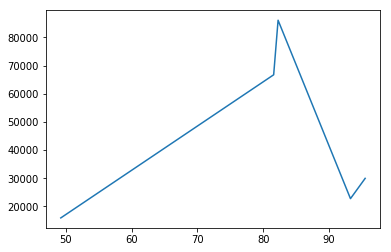

In [13]:

plt.plot(smallset_2014["GRAD_RATE"], smallset_2014["Population"])
plt.plot(smallset_2015["GRAD_RATE"], smallset_2015["Population"])
plt.plot(smallset_2016["GRAD_RATE"], smallset_2016["Population"])
plt.plot(smallset_2017["GRAD_RATE"], smallset_2017["Population"])



No handles with labels found to put in legend.


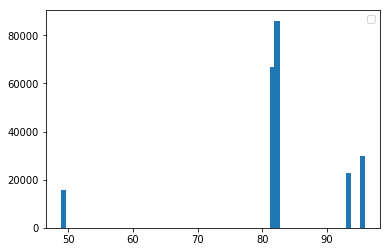

In [39]:

plt.bar(smallset_2014["GRAD_RATE"], smallset_2014["Population"])
# plt.bar(smallset_2015["GRAD_RATE"], smallset_2015["Population"])
# plt.bar(smallset_2016["GRAD_RATE"], smallset_2016["Population"])
# plt.bar(smallset_2017["GRAD_RATE"], smallset_2017["Population"])


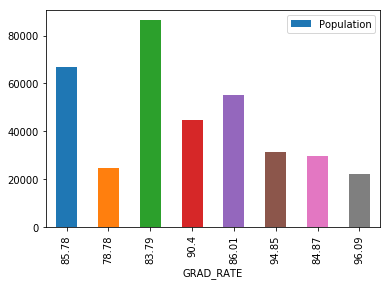

In [77]:
smallset_2016.plot.bar(x="GRAD_RATE",y="Population")


In [ ]:
smallset_2015.plot.bar(x="GRAD_RATE",y="Population")

In [ ]:
smallset_2016.plot.bar(x="GRAD_RATE",y="Population")


In [ ]:
smallset_2017.plot.bar(x="GRAD_RATE",y="Population")